# Data repository for Network Analysis of Energy Futures
## Article Title: Visualizing different perspectives in energy scenarios
## Authors: Jude H. Kurniawan (University of Waterloo), Vanessa Schweizer (University of Waterloo)

### Abstract:
Studies of energy futures have been garnering attention because they could provide the bird’s eye view of the landscape and the roadmaps toward low-carbon energy transitions (Geels et al., 2016; Rogelj et al. 2016). However, different organizations often conduct and commission energy futures studies independently and may unknowingly influence scenario outcomes to be aligned with the organizations’ perspectives—hence, stories told by different scenarios can be quite different. Insofar, research has rarely examined ways to ‘harmonize’ different scenarios, let alone ‘stitching’ them all together for producing a wider perspective of energy futures (Zurek and Henrich, 2006; Schweizer and Kurniawan, 2016). Here we apply social network analysis to visualize different perspectives of four Canadian energy futures studies and one word energy scenarios developed by different organizations. We find that certain studies have narrow perspective and appear to align with either the pro-economics or pro-environmentalism perspectives. To harmonize these different perspectives, we analyze by visualizing all scenario elements and their interrelationship derived from individual studies. We observe relational patterns underneath the complex surface for how different energy futures studies interrelate. We found that low-carbon energy transition at the global scale is highly dependent on the establishment of low-carbon governance and institutions. Interestingly, at the country-level such as Canada, low-carbon governance is not the fundamental driver; instead, Canada should be more concerned with issues related to mass consumption and freight/logistic transport. Our study suggests that understanding the country-specific fundamental driver of low-carbon energy transition will avoid ‘barking at the wrong trees.’

In [1]:
import csv
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from seaborn import color_palette, set_style, palplot

In [20]:
import pkg_resources
pkg_resources.get_distribution('networkx').version

'2.1'

### Description of Edgelist.csv file
We subjected the five energy futures studies to qualitatative analysis (a.k.a. qualitative coding technique) to search and extract text stings or statements implying scenario elements influencing others in the future. These statements suggest interrelationships between two scenario elements. We placed emphasis on the future, which means the statements decribing influences in the past would be ignored; statements indicating influences in the future would be incorporated into the dataset (Edgelist.csv). The dataset comprises a list of two scenario elements deemed to have an established relationship. In this study, the edges are non-directed influences because statements describing the interrelationship might not be explicit in indicating causations, instead they implied correlations.

In [2]:
se = pd.read_csv('./data/ES_edgelist.csv', sep=',')

Create dataframe se4 for 4 energy futures studies related to Canada...excluding the global study conducted by WEC

In [3]:
#Position 192 until the end of dataframe is the edgelist for WEC
se4 = se.iloc[:192]

In [4]:
#below is the code if i wanna drop one column in pd df
#se_edges = se.drop('report_name',axis=1)

In [5]:
GSE = nx.from_pandas_edgelist(se4,'node1','node2',edge_attr=True)

In [6]:
print(nx.info(GSE))

Name: 
Type: Graph
Number of nodes: 135
Number of edges: 181
Average degree:   2.6815


# Defining functions to assign color map to nodes and edges
The color of the edges indicates which report the edges were extracted.
The color of the nodes will be used later to indicate 'communities'

In [7]:
def create_ncolor_map(G, attribute, seaborn_palette="colorblind"):
    """Return a list of hex color mappings for node attributes"""
    attributes = [G.node[label][attribute] for label in G.nodes()]

    # get the set of possible attributes
    attributes_unique = list(set(attributes))
    num_values = len(attributes_unique)

    # generate color palette from seaborn
    node_palette = color_palette(seaborn_palette, num_values).as_hex()

    # create a mapping of attribute to color
    node_color_map = dict(zip(attributes_unique, node_palette))

    # map the attribute for each node to the color it represents
    node_colors = [node_color_map[attribute] for attribute in attributes]

    return node_colors, node_color_map, node_palette

In [8]:
def create_ecolor_map(G, attribute, seaborn_palette="colorblind"):
    """Return a list of hex color mappings for node attributes"""
    attributes = [G.edges[label][attribute] for label in G.edges()]

    # get the set of possible attributes
    attributes_unique = list(set(attributes))
    num_values = len(attributes_unique)

    # generate color palette from seaborn
    edges_palette = color_palette(seaborn_palette, num_values).as_hex()

    # create a mapping of attribute to color
    edges_color_map = dict(zip(attributes_unique, edges_palette))

    # map the attribute for each node to the color it represents
    edges_colors = [edges_color_map[attribute] for attribute in attributes]

    return edges_colors, edges_color_map, edges_palette

Set the color according to the report to visualize the pattern. If a specific color is well-spread out, it shows that the associated energy futures reports have a wide perspective. If certain color only cluttered in a small area, it indicates that the associated report has a perpective that is too narrow.

In [9]:
edges_colors, edges_color_map, edges_palette = create_ecolor_map(GSE, 'report_name')

In [10]:
#Testpoint to check that the functions created are working properly
#print(edges_colors)
print(edges_color_map)
print(edges_palette)

{'Trottier': '#0072b2', 'NEB': '#009e73', 'DeepDecarbon': '#d55e00', 'Reenergizing': '#cc79a7'}
['#0072b2', '#009e73', '#d55e00', '#cc79a7']


Calculate pagerank to define the size of the node. When pagerank is higher value, the size of the node will be bigger. The calculated pagerank is multiply by 20000 so that the max value (after calculation) is about 500-600.

In [119]:
pr = nx.pagerank(GSE)
node_size_list = []
for x in pr:
    node_size_list.append(pr[x]*20000)

# Side note:
I am also considering if pagerank is a better indicator on how influential the nodes are. I use a combo of betweenness/Eigenvector centrality measure (in scatterplot) to determine the degree (magnitude) of the influence.

In [120]:
descriptor = GSE.node()
prdf = pd.DataFrame(
    {'descriptor': descriptor,
     'pagerank': node_size_list,
    })
prdf_sorted = prdf.sort_values('pagerank',ascending=False)
prdf_sorted.head(21)

,descriptor,pagerank
10,GHG Emissions (transport),528.544693
83,Energy consumption,524.029748
1,GHG Emissions (aggregate),453.597696
60,GDP,436.435746
105,Transition to decarbonized economy,430.116459
111,Low carbon energy governance,415.113790
14,Energy intensity,397.308005
8,LNG production,392.803767
75,Innovation capacity,381.061157
0,Oil consumption,335.571169


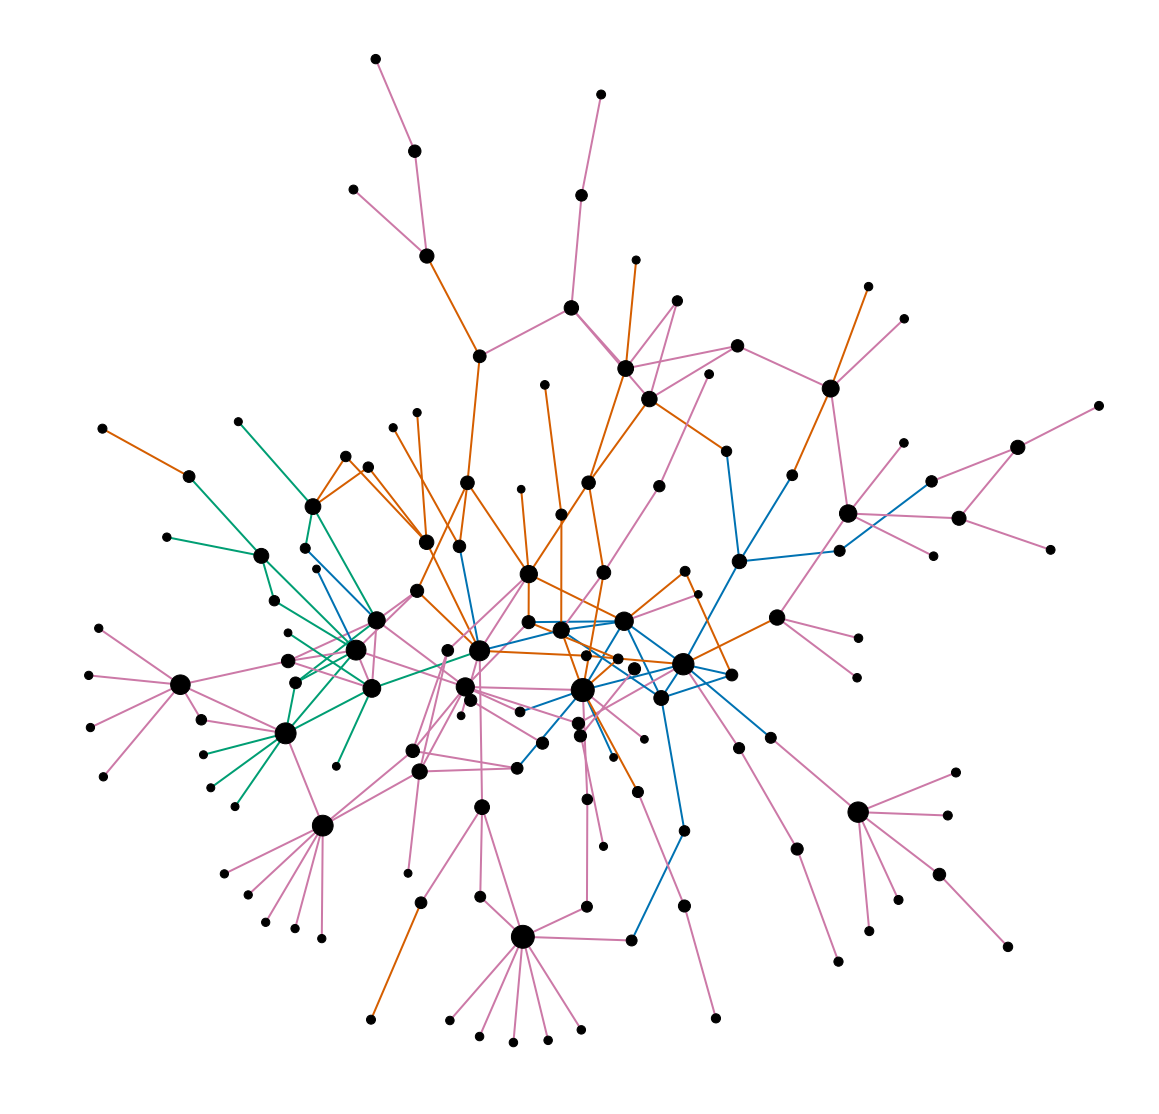

{'Trottier': '#0072b2', 'NEB': '#009e73', 'DeepDecarbon': '#d55e00', 'Reenergizing': '#cc79a7'}


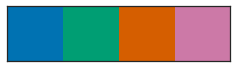

In [84]:
set_style('white')
plt.figure(figsize=(20,20))
plt.axis('off')

layout = nx.kamada_kawai_layout(GSE)
nx.draw_networkx_nodes(GSE, layout, node_color='black', node_size=node_size_list)
#nx.draw_networkx_labels(GSE, pos=layout, font_size=16)
nx.draw_networkx_edges(GSE, layout, edge_color=edges_colors,width=2)

plt.show()

# legend: I still don't know how to align the legend text with the color pa
print(edges_color_map)
palplot(edges_palette)

In [85]:
from networkx.algorithms.community import k_clique_communities, girvan_newman

In [86]:
gn_comm = girvan_newman(GSE)

In [111]:
first_iteration_comm = tuple(sorted(c) for c in next(gn_comm))
dict(enumerate(first_iteration_comm))

{0: ['Adoption of EV',
  'Biofuels consumption',
  'Biofuels production',
  'Electricity consumption',
  'Energy intensity',
  'Energy intensity (transport)',
  'Fuel switching',
  'GHG Emissions (aggregate)',
  'GHG Emissions (agriculture)',
  'GHG Emissions (oil and gas)',
  'GHG reduction target',
  'Health issues for indigenous communities',
  'Innovation capacity',
  'LNG consumption',
  'Oil consumption',
  'Tech dev in articifical intelligence',
  'Tech dev in energy storage',
  'Transport modal shift'],
 1: ['Building retrofit incentives',
  'Energy efficiency policy mandate',
  'Energy tech change (building)',
  'Energy tech change (transport)',
  'LNG production (USA)',
  'Oil demand (global)',
  'Oil prices (global)'],
 2: ['Developing countries GDP',
  'Economic productivity',
  'Educational attainment',
  'Export',
  'GDP',
  'Income per capita',
  'Innovation capacity ',
  'LNG demand (global)',
  'LNG infrastructures development',
  'LNG production',
  'Labor force',
  '

In [112]:
def map_communities(G, communities):
    """Return a mapping of community membership from a community set tuple"""
    community_map = {}
    for node in G.nodes():
        for i, comm in enumerate(communities):
            if node in comm:
                community_map[node] = i
        if community_map.get(node, None) is None:
            community_map[node] = None
    return community_map

In [113]:
community_map = map_communities(GSE, first_iteration_comm)
type(community_map)
#len(GSE.node())
nx.set_node_attributes(GSE, community_map,'community')
node_colors, node_color_map, node_palette = create_ncolor_map(GSE, 'community')

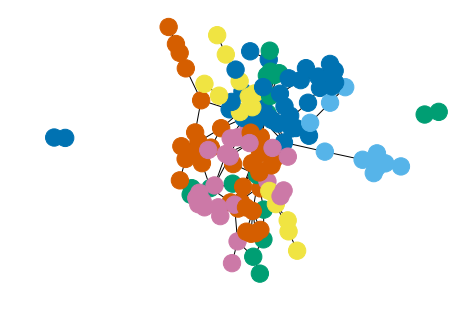

In [114]:
nx.draw(GSE, node_color=node_colors)

In [115]:
second_comm = tuple(sorted(c) for c in next(gn_comm))
community_map_2 = map_communities(GSE, second_comm)
nx.set_node_attributes(GSE, community_map_2,'community two')
#node_colors, node_color_map, node_palette = create_ncolor_map(GSE, 'community two')

third_comm = tuple(sorted(c) for c in next(gn_comm))
community_map_3 = map_communities(GSE, third_comm)
nx.set_node_attributes(GSE, community_map_3,'community three')
node_colors, node_color_map, node_palette = create_ncolor_map(GSE, 'community three')

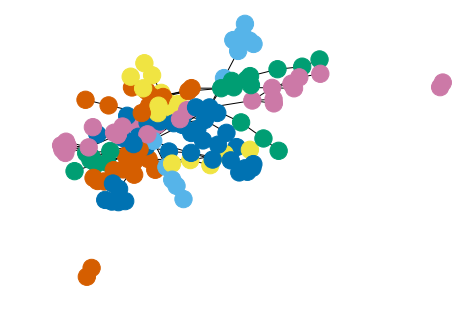

In [116]:
nx.draw(GSE, node_color=node_colors)

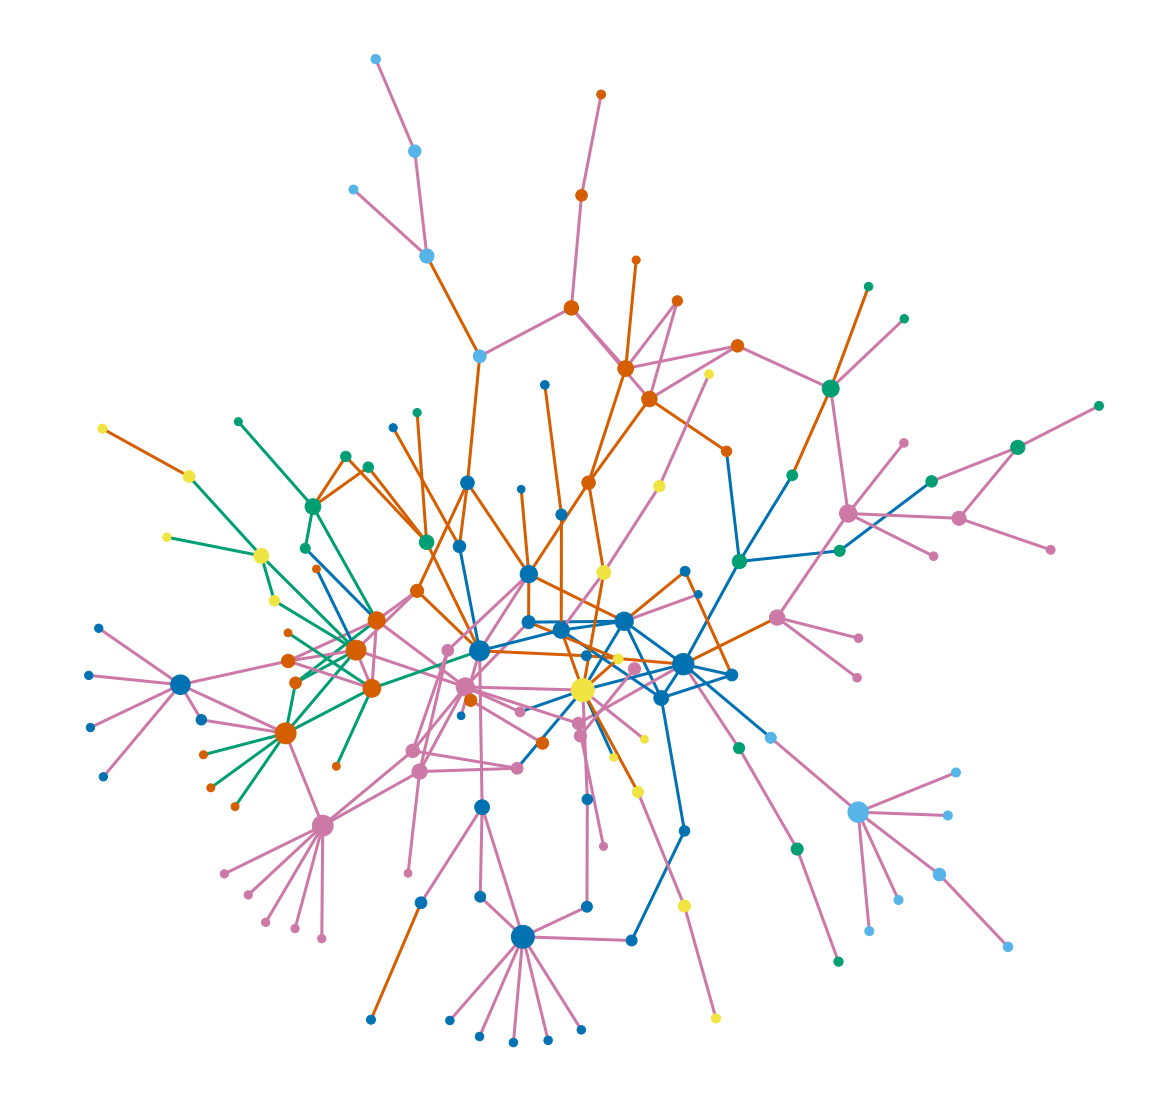

{'Trottier': '#0072b2', 'NEB': '#009e73', 'DeepDecarbon': '#d55e00', 'Reenergizing': '#cc79a7'}


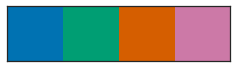

In [117]:
set_style('white')
plt.figure(figsize=(20,20))
plt.axis('off')

#layout = nx.spring_layout(GSE, random_state=28)
layout = nx.kamada_kawai_layout(GSE)
nx.draw_networkx_nodes(GSE, layout, node_color=node_colors, node_size=node_size_list)
#nx.draw_networkx_labels(GSE, pos=layout, font_size=16)
nx.draw_networkx_edges(GSE, layout, edge_color=edges_colors,width=3)

plt.show()

# legend
print(edges_color_map)
palplot(edges_palette)

In [121]:
GSE.node('community three')
dict(enumerate(third_comm))

{0: ['Adoption of EV',
  'Biofuels consumption',
  'Biofuels production',
  'Electricity consumption',
  'Energy intensity',
  'Energy intensity (transport)',
  'Fuel switching',
  'GHG Emissions (aggregate)',
  'GHG Emissions (agriculture)',
  'GHG Emissions (oil and gas)',
  'GHG reduction target',
  'Health issues for indigenous communities',
  'Innovation capacity',
  'LNG consumption',
  'Oil consumption',
  'Tech dev in articifical intelligence',
  'Tech dev in energy storage',
  'Transport modal shift'],
 1: ['Building retrofit incentives',
  'Energy efficiency policy mandate',
  'Energy tech change (building)',
  'Energy tech change (transport)',
  'LNG production (USA)',
  'Oil demand (global)',
  'Oil prices (global)'],
 2: ['Developing countries GDP',
  'Export',
  'GDP',
  'LNG demand (global)',
  'LNG infrastructures development',
  'LNG production',
  'Labor force',
  'Oil infrastructures development',
  'Oil sand production',
  'Population',
  'Rise of China and Asia',
 

# Group list
Create a dataframe of descriptors based on groups. The list of group is taken based on community three attribute which means that groups are created after subjecting communities detection three time (third iterations). There are 16 groups identified by the algorithm, however, this grouping is not the same as the output produced by CNM algorithm in NodeXL

In [141]:
gp_list1 = []
gp_list2 = []
countx = 0
for x in third_comm:
    for y in third_comm[countx]:
        gp_list1.append(y)
        gp_list2.append(countx)
    countx = countx +1
dfgp_lst = pd.DataFrame(
    {'descriptor': gp_list1,
     'group_num': gp_list2,
    })
dfgp_lst.head()

,descriptor,group_num
0,Adoption of EV,0
1,Biofuels consumption,0
2,Biofuels production,0
3,Electricity consumption,0
4,Energy intensity,0
